In [ ]:
# INSTALL EXTRA PACKAGES
!pip install transformers

# Colab  notebook

This notebook has been executed on Colab, accessing the dataset from the Drive folder.

In [ ]:
# IMPORTS
import math
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2Model
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive")

import pandas as pd
from sklearn.model_selection import train_test_split


Mounted at /content/drive


# Data loading

GPT takes Dataframes as input, and it's based on reading each file one by one.

The number of samples loaded is written to confirm the correct loading.

We use test_train_split from SKLearn to separate the test set.

In [ ]:
# LOADING THE DATASET
def load_data(root_dir):
    data = {"review": [], "target": []}

    for dir_name in os.listdir(root_dir):
        dir_path = os.path.join(root_dir, dir_name)
        if os.path.isdir(dir_path):
            label = 0 if dir_name == "bot" else 1
            for file_name in os.listdir(dir_path):
                file_path = os.path.join(dir_path, file_name)
                if os.path.isfile(file_path) and file_name.endswith(".txt"):
                    with open(file_path, "r", encoding="utf-8") as file:
                        content = file.read()
                        data["review"].append(content)
                        data["target"].append(label)

    return pd.DataFrame(data)
base_path="./drive/Shareddrives/AIDE/Business/Progetto"
root_dir = os.path.join(base_path, "dataset_1600_700")
df = load_data(root_dir)
# Splitting dei dati in set di addestramento e di test
X = df["review"]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Numero di esempi di addestramento:", len(X_train))
print("Numero di esempi di test:", len(X_test))

Numero di esempi di addestramento: 1763
Numero di esempi di test: 441


In [ ]:
# SHOW EXAMPLE
print(df.head())
print(X_train.head())
print(y_train.head())

                                              review  target
0  In that way, the whale would be able to dispor...       0
1  "Echoes of Eternity" invites its audience on a...       0
2  "Shadows of Tomorrow" emerges as a cinematic t...       0
3  "Whispers in the Dark" beckons audiences into ...       0
4  "Elysium Dreams" transports viewers to a realm...       0
1901    "The Classic War of the Worlds" by Timothy Hin...
1492    This is the best movie I've seen since White a...
1829    Ernst Lubitsch's contribution to the American ...
1850    Me and my girlfriend, Annette, watched this to...
2196    This is very dated, but that's part of the cha...
Name: review, dtype: object
1901    1
1492    1
1829    1
1850    1
2196    1
Name: target, dtype: int64


# Preprocessing

GPT is based on tokenization, which also requires to make special characters for padding and end of sentence.

In [ ]:
# TOKENIZER
MAX_LENGTH = math.ceil((X_train.apply(lambda x: len(str(x).split())).mean()))+2
print(MAX_LENGTH)

PAD_TOKEN = "<|pad|>"
EOS_TOKEN = "<|endoftext|>"

# this will download and initialize the pre trained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2",
    pad_token=PAD_TOKEN,
    eos_token=EOS_TOKEN,
    max_length=MAX_LENGTH,
    is_split_into_words=True)

# TENSORS ALLOCATION
X_train = [str(ex) + EOS_TOKEN for ex in X_train]
X_test = [str(ex) + EOS_TOKEN for ex in X_test]

X_train_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_train]
X_test_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_test]

X_train_in = tf.squeeze(tf.convert_to_tensor(X_train_), axis=1)
X_test_in = tf.squeeze(tf.convert_to_tensor(X_test_), axis=1)

255


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Example of tensor

We have found no way to have a human-readable tensor that is fed to the tokenizer

In [ ]:
X_train_in[0]

<tf.Tensor: shape=(255,), dtype=int32, numpy=
array([    1,   464, 13449,  1810,   286,   262, 19946,     1,   416,
       22283,   367,  1127,   318,   257,   845, 17774,  2646,   326,
        6189,  2925,   284,  1049,  3626,   290, 20428,   284, 42353,
       32049,   367,    13,   402,    13, 18292,     6,  6833,  1492,
          13,  1770,    13,   367,  1127, 31137,   287,  1804,   523,
          13,   314,    11,   290,   883,   508,  7342,   465,  2646,
         351,   502,    11, 16373,   262,  1109,   326,   340,   373,
         407,   262,  3210,    11, 20039,  8502, 14505,   326,  2058,
         503,   790,   614,    11,   304,    13,    70,    13,   262,
       41151,  2196,   351,  4186, 29147,   326,   550,   691,   262,
       24917, 28204,   284,   262,  1492,    13, 16263,    11,  2506,
        3073,   329,  1180,  1243,   287,   257,  3807,    13,  5845,
         508, 21786,  2405,   355, 18585,   366, 22213,   873,     1,
         804,   691,   284, 24628,  2279,   

In [ ]:
# TOKENIZATION IS DONE HERE
X_train_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_train]
X_test_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_test]

X_train_mask = tf.squeeze(tf.convert_to_tensor(X_train_mask_), axis=1)
X_test_mask = tf.squeeze(tf.convert_to_tensor(X_test_mask_), axis=1)

# Pre-trained Model

The pre-trained model is used with locked weights. We add to that only a classifier that has to output only two possible labels.

In [ ]:
# PRE TRAINED MODEL
model = TFGPT2Model.from_pretrained("gpt2", use_cache=False,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id)
model.training = True
model.resize_token_embeddings(len(tokenizer))


for layer in model.layers:
    layer.trainable = False


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:
# ADDING A CLASSIFICATION LAYER
input = tf.keras.layers.Input(shape=(None,), dtype='int32')
mask = tf.keras.layers.Input(shape=(None,), dtype='int32')
x = model(input, attention_mask=mask)
x = tf.reduce_mean(x.last_hidden_state, axis=1)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
# MODEL ALLOCATION
clf = tf.keras.Model([input, mask], output)

In [ ]:
# METRICS
base_learning_rate = 0.0005
optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)
loss=tf.keras.losses.BinaryCrossentropy()

clf.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


#Model summary

In [ ]:
clf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 tfgpt2_model (TFGPT2Model)  TFBaseModelOutputWithPastA   1244405   ['input_1[0][0]',             
                             ndCrossAttentions(last_hid   76         'input_2[0][0]']             
                             den_state=(None, None, 768                                           
                             ),                                                               

In [ ]:
# SETTING AN EARLY STOP ON PATIENCE
callbacks = tf.keras.callbacks.EarlyStopping(
        monitor="accuracy", verbose=1, patience=3, restore_best_weights=True)

In [ ]:
# LABELING
# 0 : written by bot
# 1 : written by human
def map_labels(value):
  if value == 0:
    return 0
  if value == 1:
    return 1


y_train_ = y_train.map(map_labels)
y_test_ = y_test.map(map_labels)

In [ ]:
# TENSORS FOR LABELS
y_train_in = tf.constant(y_train_, dtype=tf.int32)
y_test_in = tf.constant(y_test_, dtype=tf.int32)


tf.config.experimental_run_functions_eagerly(True)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


# Training the classifier

In [ ]:
# TRAINING THE CLASSIFICATOR
history = clf.fit([X_train_in, X_train_mask], y_train_in, epochs=3, batch_size=5, validation_split=0.2, callbacks=callbacks)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/3
282/282 [==============================] - 176s 598ms/step - loss: 2.1934 - accuracy: 0.6787 - val_loss: 0.2199 - val_accuracy: 0.9858
Epoch 2/3
282/282 [==============================] - 172s 593ms/step - loss: 0.1751 - accuracy: 0.9688 - val_loss: 0.1326 - val_accuracy: 0.9858
Epoch 3/3
282/282 [==============================] - 169s 599ms/step - loss: 0.1117 - accuracy: 0.9865 - val_loss: 0.1055 - val_accuracy: 0.9858


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


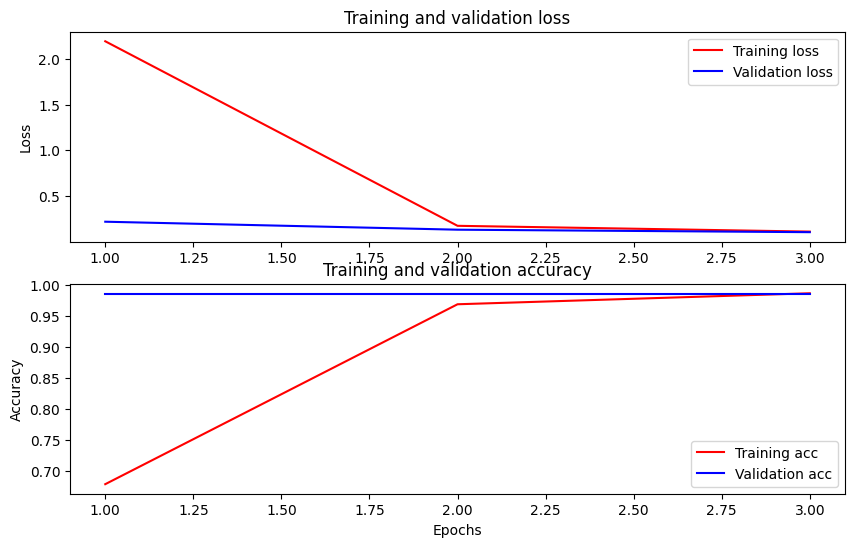

In [ ]:
#PLOT MODEL PERFOMANCE

history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Testing phase

In [ ]:
# EVALUATION
clf.evaluate([X_test_in, X_test_mask], y_test_in)

clf.training = False
y_pred = clf.predict([X_test_in, X_test_mask])

14/14 [==============================] - 8s 603ms/step
